# 29 Matplotlib plotting

Best example to know how to use matplotlib is to use examples.

1. Let's look at the trend of number of job postings over time. Line chart
2. How many jobs associated with each job titles. Bar chart

In [2]:
# importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# import data

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data cleanup - date column
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])


## 29.1 Simple example first

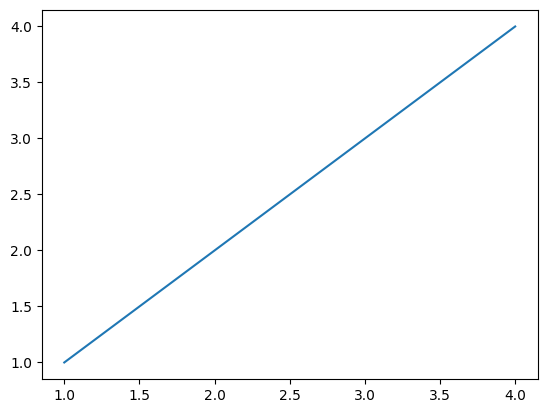

In [7]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

plt.plot(x, y)
plt.show() # to remove the line of code that appears in the results if not present

## 29.2 Line chart - Plotting job posting dates

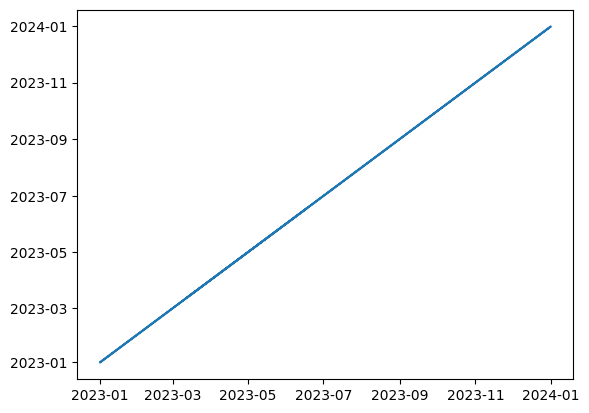

In [8]:
# we just want the date posted of the dataframe to plot it against each otehr (to get a straight line)

plt.plot(df.job_posted_date, df.job_posted_date)

In [13]:
# we need to do some aggregation to mesure how many jobs were posted per month

date_counts = df.job_posted_date.value_counts()

print(type(date_counts))

date_counts

<class 'pandas.core.series.Series'>


job_posted_date
2023-08-24 11:35:33    10
2023-01-01 23:37:09    10
2023-01-01 14:07:23    10
2023-11-09 09:02:12    10
2023-06-20 17:19:57    10
                       ..
2023-06-08 07:43:38     1
2023-01-12 06:12:32     1
2023-10-16 06:01:53     1
2023-10-07 06:15:14     1
2023-06-07 06:18:29     1
Name: count, Length: 607192, dtype: int64

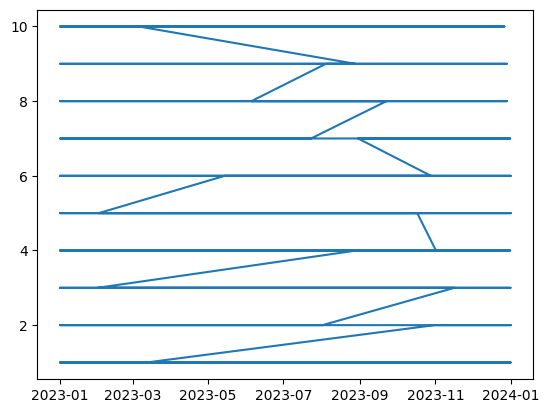

In [14]:
# looking at the output of date_counts: it is a series type
# it contains 2 info i.e. columns: the date/index and the count
# if we were to only add the variable as is in the plot, it wouldn't work. We need to precise that we want the index on the x axis and the count on the y axis  

plt.plot(date_counts.index, date_counts)

In [17]:
# it looks like a hot mess! That's because the output of date_counts aren't sorted in chronological order!
# we have to sort it

date_counts = date_counts.sort_index()
date_counts

job_posted_date
2023-01-01 00:00:04    1
2023-01-01 00:00:07    1
2023-01-01 00:00:22    1
2023-01-01 00:00:24    1
2023-01-01 00:00:27    1
                      ..
2023-12-31 23:40:18    2
2023-12-31 23:40:22    2
2023-12-31 23:40:31    2
2023-12-31 23:40:32    1
2023-12-31 23:59:58    2
Name: count, Length: 607192, dtype: int64

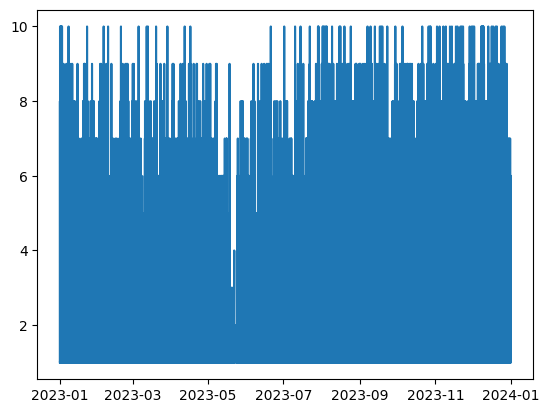

In [23]:
# let's plot it now to see!

plt.plot(date_counts.index, date_counts.values)

In [19]:
# still a hot mess, but better. 
# it looks crazy because it aggregates the data by second where jobs are posted (because it is date + time). We need to aggregate by something else e.g. day, week, month, quarter, etc. 
# we need to add a new column in the dataframe called "job_posted_month" to extract the month from the job_posted_date.

df["job_posted_month"] = df["job_posted_date"].dt.month

df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,6
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",10
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",7
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",3
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",3
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",3


In [20]:
# we now need to do redo our aggregation / counts / grouping  and sort it in chronological order

monthly_counts = df.job_posted_month.value_counts()

monthly_counts = monthly_counts.sort_index()

monthly_counts

job_posted_month
1     91822
2     64578
3     64084
4     62919
5     52104
6     61572
7     63777
8     75162
9     62359
10    66611
11    64450
12    56303
Name: count, dtype: int64

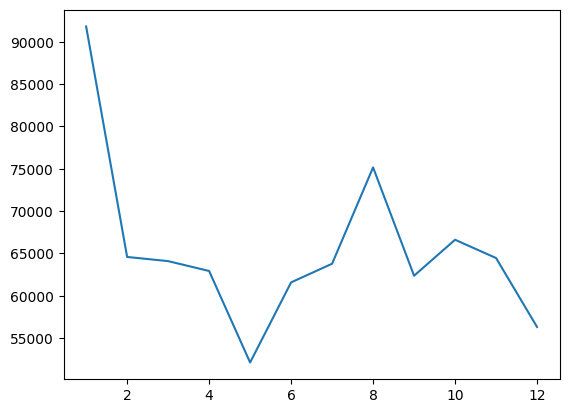

In [22]:
# let's now do the plot again

plt.plot(monthly_counts.index, monthly_counts.values)

## 29.3 Series vs dataframe

Numpy uses something called "series". They are effectively an array, a subset of a larger dataframe.

In [25]:
# this is a series. Each entry has got an index.

pd.Series([10, 20, 30, 40, 50])

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [27]:
# i can also modify the way the index is displayed

series = pd.Series([10, 20, 30, 40, 50], index=["a", "b", "c", "d", "e"])
series

a    10
b    20
c    30
d    40
e    50
dtype: int64

In [28]:
# to access the series index

series.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [29]:
# to access the values

series.values

# they are provided back as an array

array([10, 20, 30, 40, 50])

In [30]:
# a column of data within a dataframe is also a series :)

## 29.4 Bar chart - Count of job postings per job title

In [35]:
# this is all the unique job titles we have and the count for each

job_counts = df.job_title_short.value_counts()

job_counts

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

<BarContainer object of 10 artists>

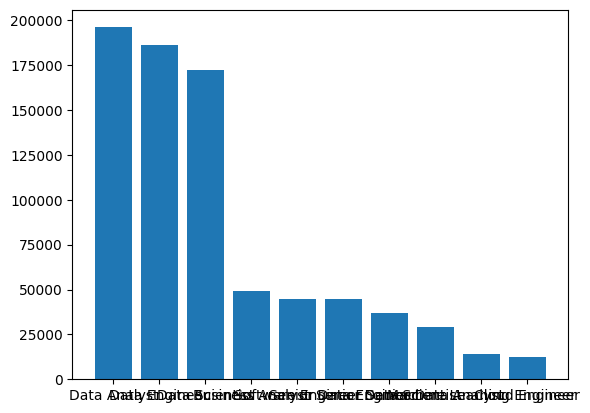

In [36]:
# plot the bar chart

plt.bar(job_counts.index, job_counts)

<BarContainer object of 10 artists>

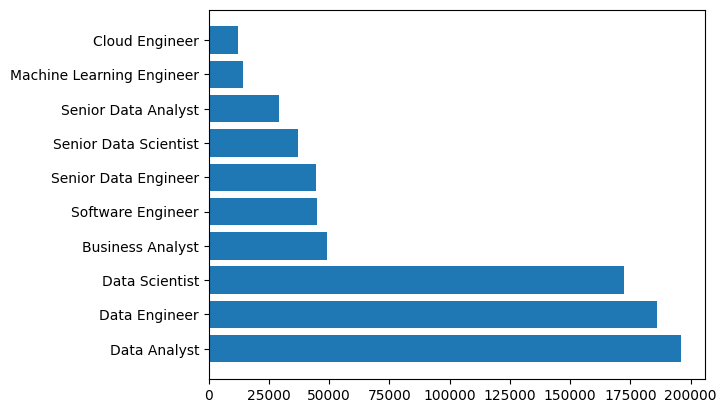

In [37]:
# the job titles are a hot mess - they overlap!!

# we can use the bar h function, to have it horizontally

plt.barh(job_counts.index, job_counts)

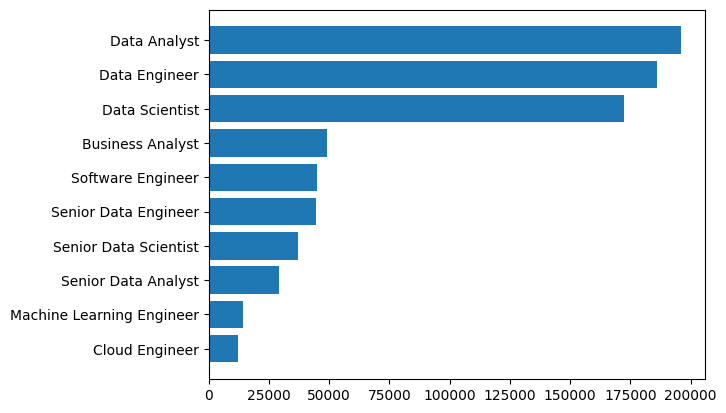

In [40]:
# in a horizontal, it starts from the bottom and makes it way up. Like a vertical one, it goes from left to right
# we want to sort it the other way around
# we can do it by sorting in ascending order

job_counts = job_counts.sort_values(ascending=True)
plt.barh(job_counts.index, job_counts)
plt.show()


# 29 Problems

## 1.29.1

Create a bar chart showing the number of job postings for the job_country. Use the job_country column and count the number of postings for each location. Only get the top 5 job countries. Additionally, change the color of the bars to 'orange'.

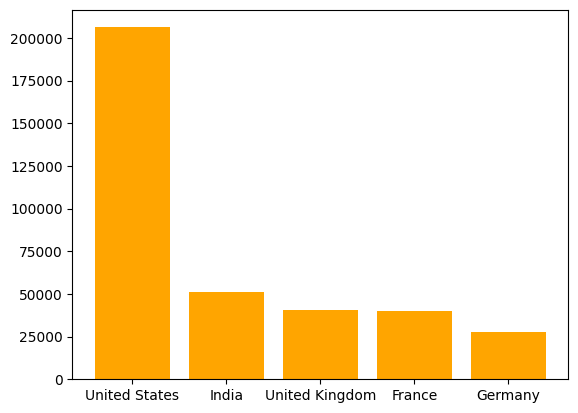

In [48]:
job_per_country = df.job_country.value_counts().head(5)
job_per_country

plt.bar(job_per_country.index, job_per_country, color="orange")
plt.show()

## 1.29.2

Create a horizontal bar chart showing the average yearly salary for different job titles. Use the job_title_short and salary_year_avg columns to calculate the average salary for each job title.

<BarContainer object of 10 artists>

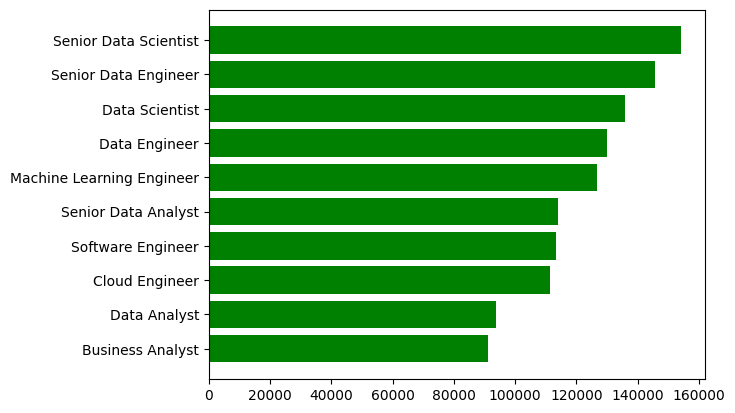

In [55]:
# calculate average salary per job title

avg_salary_per_job = df.groupby("job_title_short")["salary_year_avg"].mean()

avg_salary_per_job = avg_salary_per_job.sort_values(ascending=True)

# plotting hbar chart

plt.barh(avg_salary_per_job.index, avg_salary_per_job, color="Green")

## 1.29.3

Create a line plot showing the trend of average yearly salary over the months of the year. Use the job_posted_date column to extract the month and calculate the average salary for each month.

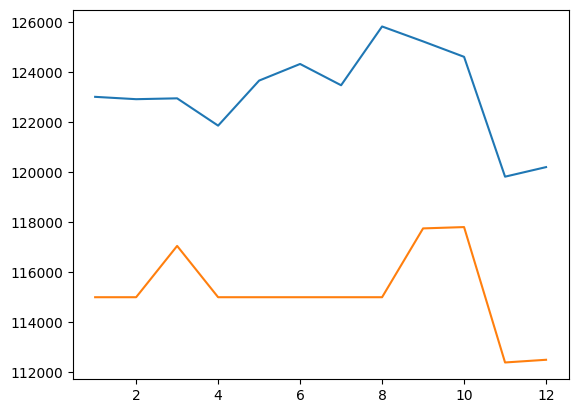

In [72]:
# create a new month column

df["job_posted_month"] = df["job_posted_date"].dt.month

avg_salary_per_month = df.groupby("job_posted_month")["salary_year_avg"].agg(["mean", "median"])

# avg_salary_per_month

plt.plot(avg_salary_per_month.index, avg_salary_per_month)
plt.show()